# Binary Classification with a Bank Dataset

https://www.kaggle.com/competitions/playground-series-s5e8/overview

## Goal: The goal is to predict whether a client will subscribe to a bank term deposit. We'll be deploying various ML models and EDA techniques to achieve the Goal.

## Data: 
    Data is taken from 
https://www.kaggle.com/competitions/playground-series-s5e8/data
    
        * train.csv - the training dataset; y is the binary target.
        * test.csv - the test dataset; your objective is to predict the probability y for each row.
        * sample_submission.csv - a sample submission file in the correct format.
        
    Data Dictionary:
https://www.kaggle.com/datasets/sushant097/bank-marketing-dataset-full        

## Evaluation: 
    Submissions are evaluated using ROC AUC between the predicted value and the observed target.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./Resources/train.csv")
data

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


### Preprocessing of data:
1. Converting object into pandas categories.
2. Checking for missing values.
3. Imputing missing values.
4. Converting non-numeric to numeric.

In [4]:
# Checking for the missing values
data.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
# checking for the non-numeric data type
non_numeric_cols = []
for name, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        non_numeric_cols.append(name)

print(non_numeric_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [4]:
# Turning non_numeric cols to categorical data

for name in non_numeric_cols:
    data[name] = pd.Categorical(data[name], ordered=True).codes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   id         750000 non-null  int64
 1   age        750000 non-null  int64
 2   job        750000 non-null  int8 
 3   marital    750000 non-null  int8 
 4   education  750000 non-null  int8 
 5   default    750000 non-null  int8 
 6   balance    750000 non-null  int64
 7   housing    750000 non-null  int8 
 8   loan       750000 non-null  int8 
 9   contact    750000 non-null  int8 
 10  day        750000 non-null  int64
 11  month      750000 non-null  int8 
 12  duration   750000 non-null  int64
 13  campaign   750000 non-null  int64
 14  pdays      750000 non-null  int64
 15  previous   750000 non-null  int64
 16  poutcome   750000 non-null  int8 
 17  y          750000 non-null  int64
dtypes: int64(9), int8(9)
memory usage: 57.9 MB


In [7]:
data.job.value_counts()

job
4     175541
1     170498
9     138107
0      81492
7      64209
5      35185
6      19020
2      17718
10     17634
3      15912
8      11767
11      2917
Name: count, dtype: int64

In [8]:
original_data = pd.read_csv("./Resources/train.csv")
original_data.job.value_counts()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

In [9]:
original_data.marital.value_counts(), data.marital.value_counts()

(marital
 married     480759
 single      194834
 divorced     74407
 Name: count, dtype: int64,
 marital
 1    480759
 2    194834
 0     74407
 Name: count, dtype: int64)

### EDA to check for the sensible features

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   id         750000 non-null  int64
 1   age        750000 non-null  int64
 2   job        750000 non-null  int8 
 3   marital    750000 non-null  int8 
 4   education  750000 non-null  int8 
 5   default    750000 non-null  int8 
 6   balance    750000 non-null  int64
 7   housing    750000 non-null  int8 
 8   loan       750000 non-null  int8 
 9   contact    750000 non-null  int8 
 10  day        750000 non-null  int64
 11  month      750000 non-null  int8 
 12  duration   750000 non-null  int64
 13  campaign   750000 non-null  int64
 14  pdays      750000 non-null  int64
 15  previous   750000 non-null  int64
 16  poutcome   750000 non-null  int8 
 17  y          750000 non-null  int64
dtypes: int64(9), int8(9)
memory usage: 57.9 MB


In [11]:
len(data.id.unique())

750000

In [5]:
# Dropping ID col as all are unique and model will not derive any pattern on it.
data.drop("id", axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        750000 non-null  int64
 1   job        750000 non-null  int8 
 2   marital    750000 non-null  int8 
 3   education  750000 non-null  int8 
 4   default    750000 non-null  int8 
 5   balance    750000 non-null  int64
 6   housing    750000 non-null  int8 
 7   loan       750000 non-null  int8 
 8   contact    750000 non-null  int8 
 9   day        750000 non-null  int64
 10  month      750000 non-null  int8 
 11  duration   750000 non-null  int64
 12  campaign   750000 non-null  int64
 13  pdays      750000 non-null  int64
 14  previous   750000 non-null  int64
 15  poutcome   750000 non-null  int8 
 16  y          750000 non-null  int64
dtypes: int64(8), int8(9)
memory usage: 52.2 MB


#### Let's see how much `marital type` influences the `target`


In [14]:
data.marital.value_counts(), original_data.marital.value_counts()

(marital
 1    480759
 2    194834
 0     74407
 Name: count, dtype: int64,
 marital
 married     480759
 single      194834
 divorced     74407
 Name: count, dtype: int64)

In [15]:
married_1 = ((original_data.marital == "married") & (data.y == 1)).sum()

single_1 = ((original_data.marital == "single") & (data.y == 1)).sum()

divorced_1 = ((original_data.marital == "divorced") & (data.y == 1)).sum()
print(married_1 + single_1 + divorced_1, (data.y == 1).sum())

90488 90488


{'Married': np.int64(48976), 'Single': np.int64(33210), 'Divorced': np.int64(8302)}


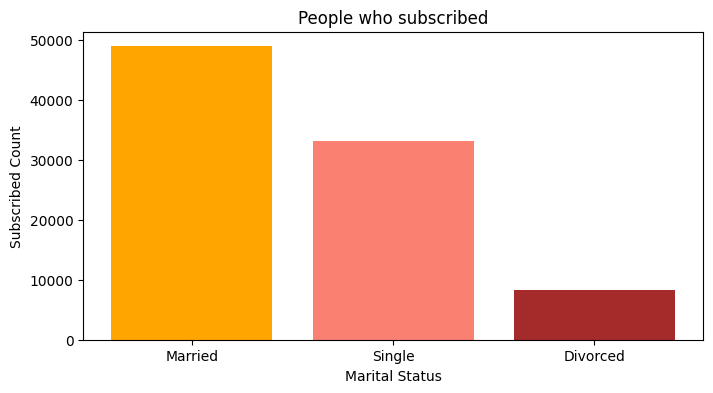

In [16]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (8, 4))
colors = ["orange", "salmon", "brown"]
ax.bar(["Married", "Single", "Divorced"], [married_1, single_1, divorced_1], color= colors)
ax.set(xlabel = "Marital Status", ylabel = "Subscribed Count", title = "People who subscribed");
print({"Married" : married_1, 
       "Single" : single_1, 
       "Divorced" : divorced_1})

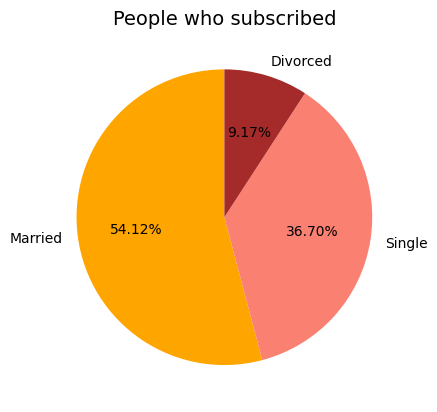

In [17]:
plt.pie([married_1, single_1, divorced_1], labels = ["Married", "Single", "Divorced"], autopct = '%1.2f%%', startangle = 90, colors = ["orange", "salmon", "brown"]);
plt.title("People who subscribed", fontsize = 14);

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        750000 non-null  int64
 1   job        750000 non-null  int8 
 2   marital    750000 non-null  int8 
 3   education  750000 non-null  int8 
 4   default    750000 non-null  int8 
 5   balance    750000 non-null  int64
 6   housing    750000 non-null  int8 
 7   loan       750000 non-null  int8 
 8   contact    750000 non-null  int8 
 9   day        750000 non-null  int64
 10  month      750000 non-null  int8 
 11  duration   750000 non-null  int64
 12  campaign   750000 non-null  int64
 13  pdays      750000 non-null  int64
 14  previous   750000 non-null  int64
 15  poutcome   750000 non-null  int8 
 16  y          750000 non-null  int64
dtypes: int64(8), int8(9)
memory usage: 52.2 MB


### Modelling
1. data prep
2. Model selection

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        750000 non-null  int64
 1   job        750000 non-null  int8 
 2   marital    750000 non-null  int8 
 3   education  750000 non-null  int8 
 4   default    750000 non-null  int8 
 5   balance    750000 non-null  int64
 6   housing    750000 non-null  int8 
 7   loan       750000 non-null  int8 
 8   contact    750000 non-null  int8 
 9   day        750000 non-null  int64
 10  month      750000 non-null  int8 
 11  duration   750000 non-null  int64
 12  campaign   750000 non-null  int64
 13  pdays      750000 non-null  int64
 14  previous   750000 non-null  int64
 15  poutcome   750000 non-null  int8 
 16  y          750000 non-null  int64
dtypes: int64(8), int8(9)
memory usage: 52.2 MB


In [20]:
# Making features and labels

X = data.drop("y", axis = 1)
y = data["y"]

In [21]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (0.5))

In [7]:
# Importing test data
test_data = pd.read_csv("./Resources/test.csv")
test_data.head(10)
np.random.seed(42)
# Preprocessing the test data => converting the non-numeric to numeric types
for name, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_data[name] = pd.Categorical(content).codes

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   id         250000 non-null  int64
 1   age        250000 non-null  int64
 2   job        250000 non-null  int8 
 3   marital    250000 non-null  int8 
 4   education  250000 non-null  int8 
 5   default    250000 non-null  int8 
 6   balance    250000 non-null  int64
 7   housing    250000 non-null  int8 
 8   loan       250000 non-null  int8 
 9   contact    250000 non-null  int8 
 10  day        250000 non-null  int64
 11  month      250000 non-null  int8 
 12  duration   250000 non-null  int64
 13  campaign   250000 non-null  int64
 14  pdays      250000 non-null  int64
 15  previous   250000 non-null  int64
 16  poutcome   250000 non-null  int8 
dtypes: int64(8), int8(9)
memory usage: 17.4 MB


In [9]:
# Dropping the ID columns as well from the test data so as to be similar to the training data.
# To submit, we'll need ID's, thus we aren't shuffling any of the test_data's result and thus can be directly sent.\

test_data.drop("id", axis = 1, inplace = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        250000 non-null  int64
 1   job        250000 non-null  int8 
 2   marital    250000 non-null  int8 
 3   education  250000 non-null  int8 
 4   default    250000 non-null  int8 
 5   balance    250000 non-null  int64
 6   housing    250000 non-null  int8 
 7   loan       250000 non-null  int8 
 8   contact    250000 non-null  int8 
 9   day        250000 non-null  int64
 10  month      250000 non-null  int8 
 11  duration   250000 non-null  int64
 12  campaign   250000 non-null  int64
 13  pdays      250000 non-null  int64
 14  previous   250000 non-null  int64
 15  poutcome   250000 non-null  int8 
dtypes: int64(7), int8(9)
memory usage: 15.5 MB


In [25]:
# Estimator

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
models = {"Logistic Regression" : LogisticRegression(),
          "SGD Classifier" : SGDClassifier(),
          "Random Forest" : RandomForestClassifier(n_estimators=50, n_jobs=-1),
          "KNN Classifier" : KNeighborsClassifier()}
model_score = {}
def modelling_scoring(models, X_train, y_train, X_test, y_test):
    """
    Custom Function to predict the scores while testing on various models.
    """
    for name, model in models.items():
        # Fitting on the data of 1 lakhs only
        model.fit(X_train[ : 10000], y_train[ : 10000])
        model_score[name] = model.score(X_test, y_test)

    # Visualizing the model_scores 
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize = (6, 4))
    ax.bar(model_score.keys(), model_score.values(), color = ["salmon", "lightblue", "orange", "violet"])
    ax.set(xlabel = "Models", ylabel = "Accuracy", title = "Accuracy of different models");

In [27]:
modelling_scoring(models, X_train, y_train, X_test, y_test)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(model_score.keys(), model_score.values(), color = ["salmon", "lightblue", "orange", "violet"])
ax.set(xlabel = "Models", ylabel = "Accuracy", title = "Accuracy of different models");
print(model_score)

Clearly, RandomForest ha worked the best. Let's further hypertune this only

In [ ]:
def comparizon(y_true, y_pred):
    pd.DataFrame(y_true, y_pred)

In [28]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

# y_pred_prob = model.predict_proba(X_test)[:, 1]
model.score(X_test, y_test)

0.931864

In [29]:
y_pred_prob = model.predict_proba(test_data)[:, 1]

In [30]:
len(y_pred_prob)

250000

In [ ]:
test_data_id = pd.read_csv("./Resources/test.csv")
test_data_id["id"]

In [ ]:
submission_1 = pd.DataFrame()
submission_1["id"] = test_data_id["id"]
submission_1["y"] = y_pred_prob
submission_1.head()

In [ ]:
y_pred_prob

In [ ]:
len(submission_1)

In [ ]:
submission_1.to_csv("submission_1.csv", index = False)

## Did the first submission with :
1. Accuracy 0.931864
2. Model RandomForestClassifier(n_estimators=100, n_jobs=-1)
3. `tain.csv` dataset was split into 50% of the test and 50% of the training data.
4. And the model was trained on the entire 50% of the `train.csv` data and even the score came was with the evaluation of the rest 50%.

## What we'll be trying further:
1. Increasing the training data to 70% and shuffling it as well.
2. Use GridSearchCV

In [10]:
# Shuffling the entire train.csv data

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1


In [11]:
np.random.seed(42)
data = data.sample(frac = 1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
404846,46,7,2,1,0,1279,0,1,0,18,5,114,2,-1,0,3,0
580313,27,0,2,1,0,2501,0,0,0,13,1,438,1,105,1,2,0
552086,36,7,1,1,0,1355,0,0,2,20,6,10,4,-1,0,3,0
370876,59,4,1,0,0,1516,0,0,0,3,3,71,2,-1,0,3,0
239330,39,9,1,2,0,3370,0,0,0,14,1,114,2,-1,0,3,0


In [12]:
X = data.drop("y", axis = 1)
y = data["y"]
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 404846 to 121958
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        750000 non-null  int64
 1   job        750000 non-null  int8 
 2   marital    750000 non-null  int8 
 3   education  750000 non-null  int8 
 4   default    750000 non-null  int8 
 5   balance    750000 non-null  int64
 6   housing    750000 non-null  int8 
 7   loan       750000 non-null  int8 
 8   contact    750000 non-null  int8 
 9   day        750000 non-null  int64
 10  month      750000 non-null  int8 
 11  duration   750000 non-null  int64
 12  campaign   750000 non-null  int64
 13  pdays      750000 non-null  int64
 14  previous   750000 non-null  int64
 15  poutcome   750000 non-null  int8 
dtypes: int64(7), int8(9)
memory usage: 52.2 MB
<class 'pandas.core.series.Series'>
Index: 750000 entries, 404846 to 121958
Series name: y
Non-Null Count   Dtype
--------------   -----
75

(None, None)

In [14]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
model = RandomForestClassifier(n_estimators=300, n_jobs = -1, max_depth = 30, max_features = "sqrt")
model.fit(X_train, y_train)
# y_pred_proba = model.predict_proba(X_test)
model.score(X_test, y_test)

# This has the score: 0.9331955555555556

NameError: name 'RandomForestClassifier' is not defined

In [43]:
y_pred_prob = model.predict_proba(test_data)[:, 1]
y_pred_prob

In [ ]:
submission_2 = pd.DataFrame()
submission_2["id"] = test_data_id["id"]
submission_2["y"] = y_pred_prob
submission_2.head()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [16]:
# That is how we submitted the second submission.
